In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")



from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv("cars24.csv")
df

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000
...,...,...,...,...,...,...,...,...,...,...
8010,8010,Datsun Redi Go,2018.0,11500,1,PETROL,MH-01,Manual,HatchBack,292000
8011,8011,Toyota YARIS,2018.0,73393,2,PETROL,KA-03,Manual,Sedan,534000
8012,8012,Volkswagen Ameo,2016.0,83810,2,PETROL,UP-78,Manual,Sedan,424000
8013,8013,Hyundai GRAND I10 NIOS,2019.0,39162,1,PETROL,CH-01,Automatic,HatchBack,685000


In [3]:
df.columns

Index(['Unnamed: 0', 'Car Name', 'Year', 'Distance', 'Owner', 'Fuel',
       'Location', 'Drive', 'Type', 'Price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 
 2   Year        8014 non-null   float64
 3   Distance    8015 non-null   int64  
 4   Owner       8015 non-null   int64  
 5   Fuel        8015 non-null   object 
 6   Location    7802 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


In [5]:
#Droping Unnamed column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [7]:
df.isnull().sum()

Car Name      1
Year          1
Distance      0
Owner         0
Fuel          0
Location    213
Drive         0
Type          0
Price         0
dtype: int64

In [8]:
df["Location"].replace(" ",np.nan,inplace=True)
df["Location"].fillna("None",inplace=True)
df["Location"].isnull().sum()

0

In [9]:
df.isnull().sum()

Car Name    1
Year        1
Distance    0
Owner       0
Fuel        0
Location    0
Drive       0
Type        0
Price       0
dtype: int64

In [10]:
df["Car Name"].fillna("No Name",inplace=True)
df["Car Name"].isnull().sum()

0

In [11]:
df["Year"].fillna(0,inplace=True)
df["Year"].isnull().sum()

0

In [12]:
df.isnull().sum()

Car Name    0
Year        0
Distance    0
Owner       0
Fuel        0
Location    0
Drive       0
Type        0
Price       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  8015 non-null   object 
 1   Year      8015 non-null   float64
 2   Distance  8015 non-null   int64  
 3   Owner     8015 non-null   int64  
 4   Fuel      8015 non-null   object 
 5   Location  8015 non-null   object 
 6   Drive     8015 non-null   object 
 7   Type      8015 non-null   object 
 8   Price     8015 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 563.7+ KB


In [14]:
df["Year"]=df["Year"].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car Name  8015 non-null   object
 1   Year      8015 non-null   int32 
 2   Distance  8015 non-null   int64 
 3   Owner     8015 non-null   int64 
 4   Fuel      8015 non-null   object
 5   Location  8015 non-null   object
 6   Drive     8015 non-null   object
 7   Type      8015 non-null   object
 8   Price     8015 non-null   int64 
dtypes: int32(1), int64(3), object(5)
memory usage: 532.4+ KB


In [16]:
df.head()

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [17]:
df['Location']=df['Location'].replace('[\d-]','',regex=True)
df['Location'].unique()

array(['HR', 'TN', 'TS', 'WB', 'MH', 'None', 'UP', 'KA', 'PB', 'GJ',
       'DLC', 'DL', 'CH', 'KL', 'RJ', 'BR', 'AP', 'MP', 'BH'],
      dtype=object)

In [18]:
dict={'HR':'Haryana','TN':'Tamil Nadu','TS':'Telangana','WB':'West Bengal','MH':'Maharashtra',
    'None':'None','UP':'Uttar Pradesh','KA':'Karnataka','PB':'Punjab','GJ':'Gujarat','DLC':'Delhi',
    'DL':'Delhi','CH':'Chandigarh','KL':'Kerala','RJ':'Rajasthan','BR':'Bihar','AP':'Andhra Pradesh',
    'MP':'Madhya Pradesh','BH':'Bihar'}
df['Location']=df['Location'].replace(dict)
df['Location'].unique()

array(['Haryana', 'Tamil Nadu', 'Telangana', 'West Bengal', 'Maharashtra',
       'None', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Gujarat', 'Delhi',
       'Chandigarh', 'Kerala', 'Rajasthan', 'Bihar', 'Andhra Pradesh',
       'Madhya Pradesh'], dtype=object)

In [19]:
#Max Distance
df.loc[df["Distance"]==df["Distance"].max()]

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
4098,Hyundai Elite i20,2017,971212,3,PETROL,None,Manual,HatchBack,583000


In [20]:
#Min Price
df.loc[df["Price"]==df["Price"].min()]

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
6968,Maruti Alto,2010,49984,1,PETROL,Uttar Pradesh,Manual,HatchBack,119000


In [21]:
#car name,distance and year of single owner cng car and price between 5 lac to 7 lac
df[["Car Name","Distance","Year"]].loc[(df["Owner"]==1) & (df["Fuel"]=="CNG") & (df["Price"]>=300000) & (df["Price"]<=400000)]

,Car Name,Distance,Year
171,Maruti Wagon R 1.0,75537,2017
238,Maruti Wagon R 1.0,40670,2014
419,Maruti Wagon R 1.0,59340,2017
634,Maruti Alto 800,45385,2017
674,Maruti Wagon R 1.0,64500,2014
1166,Maruti Wagon R 1.0,62162,2017
1537,Maruti Alto,63515,2019
1652,Maruti Wagon R 1.0,52685,2014
1726,Maruti S PRESSO,89221,2019
1815,Maruti Alto,51964,2019


In [22]:
#Groupby location and Fuel Type
location=df.groupby(["Location","Fuel"])
for i in location:
    print(i[0])
    print(i[1])

('Andhra Pradesh', 'DIESEL')
                Car Name  Year  Distance  Owner    Fuel        Location  \
640    Hyundai Grand i10  2013     84969      2  DIESEL  Andhra Pradesh   
678   Maruti Swift Dzire  2011     57508      1  DIESEL  Andhra Pradesh   
1083     Volkswagen Ameo  2016    103128      1  DIESEL  Andhra Pradesh   
1573         Maruti Ritz  2012    118173      2  DIESEL  Andhra Pradesh   
1672        Maruti Swift  2013     92389      2  DIESEL  Andhra Pradesh   
1810  Maruti Swift Dzire  2013     99860      1  DIESEL  Andhra Pradesh   
2413       Hyundai Verna  2013     45517      1  DIESEL  Andhra Pradesh   
2581        Maruti Swift  2013     85326      2  DIESEL  Andhra Pradesh   
2723       Hyundai Verna  2016     90102      1  DIESEL  Andhra Pradesh   
2931        Maruti Swift  2012     89503      2  DIESEL  Andhra Pradesh   
3959     Mahindra XUV500  2014     95918      1  DIESEL  Andhra Pradesh   
4045       Maruti Ertiga  2013     99344      2  DIESEL  Andhra Pradesh

In [23]:
#Location from maharashtra ,drive is autoomatic and type is hatchback 
loca=df.groupby(["Location"])
loca.get_group("Maharashtra").loc[(df["Drive"]=="Automatic") & (df["Type"]=="HatchBack")]

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
11,Maruti S PRESSO,2019,30347,1,PETROL,Maharashtra,Automatic,HatchBack,481000
41,Maruti Baleno,2017,33669,2,PETROL,Maharashtra,Automatic,HatchBack,675000
62,Maruti Celerio X,2018,32891,1,PETROL,Maharashtra,Automatic,HatchBack,595000
77,Maruti Baleno,2016,68815,1,PETROL,Maharashtra,Automatic,HatchBack,584000
95,Toyota Glanza,2020,35636,1,PETROL,Maharashtra,Automatic,HatchBack,809000
...,...,...,...,...,...,...,...,...,...
7709,Hyundai Grand i10,2016,54586,1,PETROL,Maharashtra,Automatic,HatchBack,591000
7826,Maruti Wagon R 1.0,2016,55901,2,PETROL,Maharashtra,Automatic,HatchBack,436000
7912,Honda Jazz,2021,9952,1,PETROL,Maharashtra,Automatic,HatchBack,891000
7942,Maruti Baleno,2016,71469,1,PETROL,Maharashtra,Automatic,HatchBack,570000


In [24]:
#cars which are SUV of 2022 and distance less than 5000
a=df.groupby(["Type"])
a.get_group("SUV").loc[(df["Year"]==2022) & (df["Distance"]<5000)]

,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
99,Maruti Eeco,2022,2075,1,CNG,Kerala,Manual,SUV,552000
814,Renault TRIBER,2022,2648,1,PETROL,Gujarat,Manual,SUV,806000
958,Tata PUNCH,2022,3750,1,PETROL,Gujarat,Automatic,SUV,879000
1042,Tata PUNCH,2022,4392,1,PETROL,Punjab,Manual,SUV,736000
1246,KIA SONET,2022,3713,1,DIESEL,Gujarat,Manual,SUV,1348000
1395,Volkswagen TAIGUN,2022,3686,1,PETROL,Bihar,Manual,SUV,1473000
1431,Renault TRIBER,2022,1675,1,PETROL,Gujarat,Manual,SUV,659000
2031,Hyundai Creta,2022,2747,1,PETROL,Bihar,Manual,SUV,1150000
2175,Hyundai Creta,2022,4164,1,DIESEL,Maharashtra,Manual,SUV,1449000
2900,Renault TRIBER,2022,4614,1,PETROL,Tamil Nadu,Manual,SUV,807000


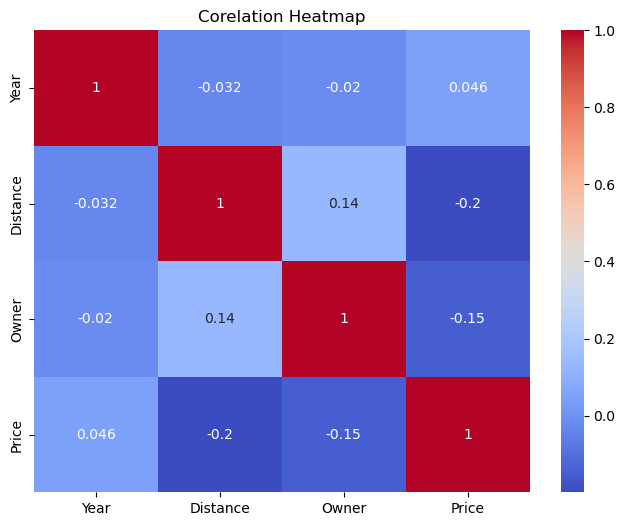

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Corelation Heatmap")
plt.show()

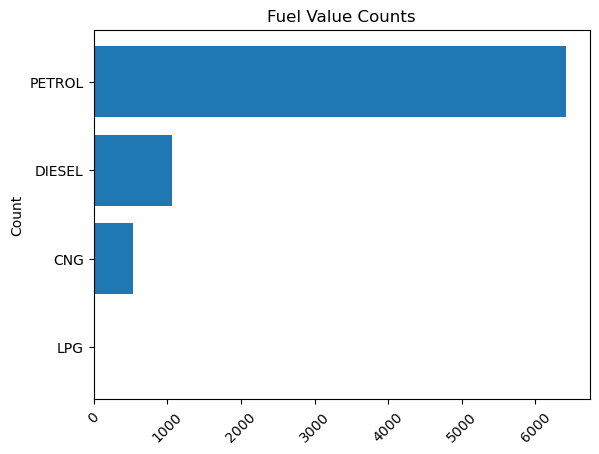

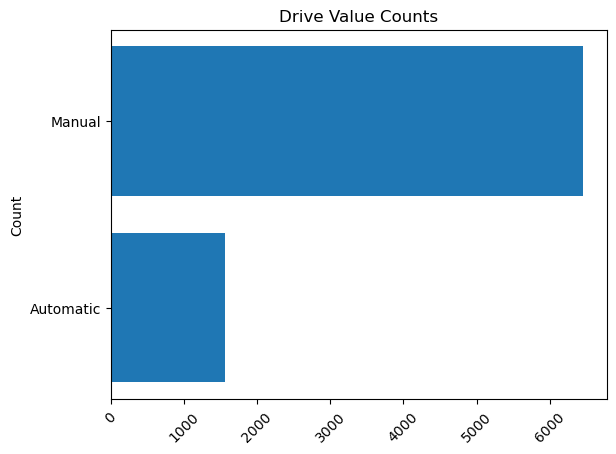

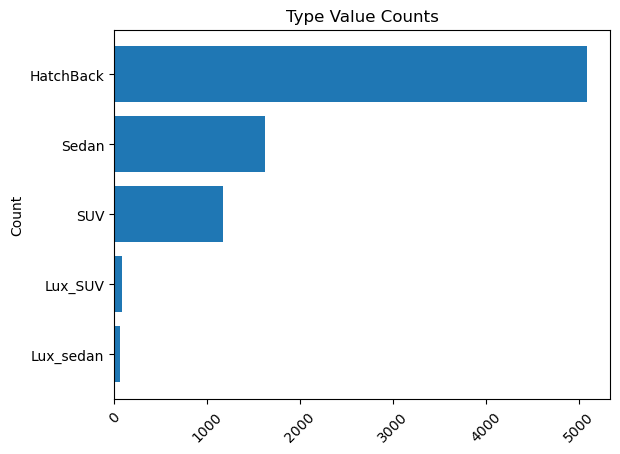

In [26]:
columns=df[["Fuel","Drive","Type"]]

for col in columns:
    value_counts = df[col].value_counts(ascending = True)
    plt.subplots(1, 1)
    plt.barh(value_counts.index, value_counts.values)
    plt.ylabel('Count')
    plt.title(f'{col} Value Counts')
    plt.xticks(rotation=45)
    plt.show()

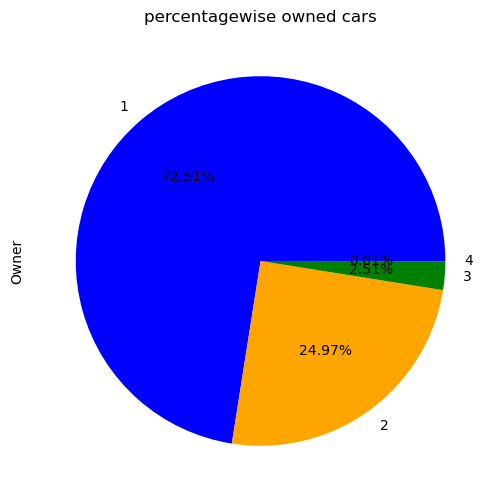

In [27]:
plt.figure(figsize=(6,6))
df["Owner"].value_counts().plot.pie(autopct="%1.2f%%",colors=["Blue","Orange","Green","Red"])
plt.title("percentagewise owned cars")
plt.show()


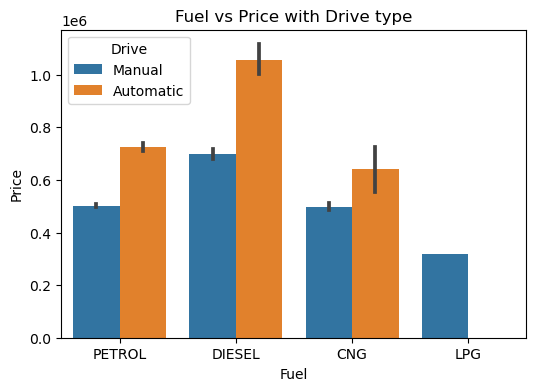

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(data=df,x="Fuel",y="Price",hue="Drive")
plt.title("Fuel vs Price with Drive type")
plt.show()

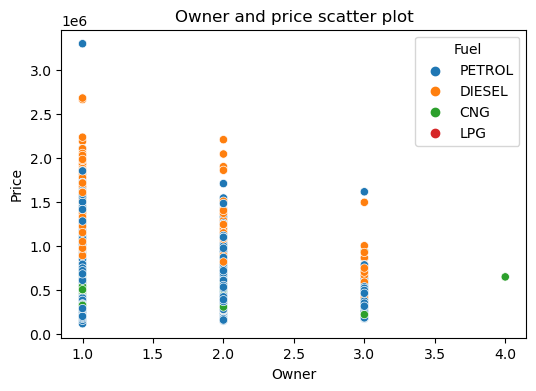

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="Owner",y="Price",hue="Fuel")
plt.title("Owner and price scatter plot")
plt.show()

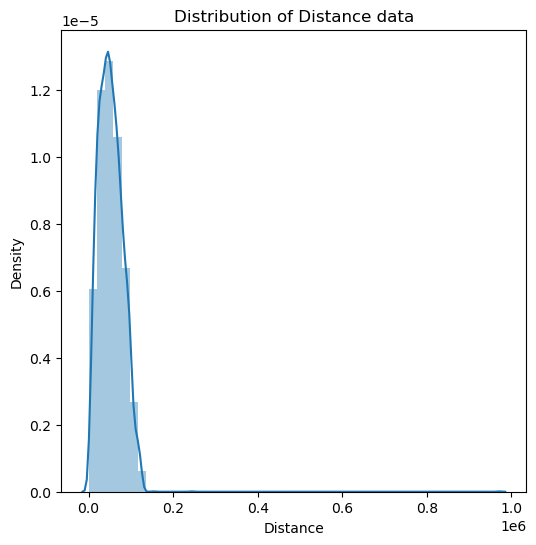

In [30]:
plt.figure(figsize=(6,6))
sns.distplot(df["Distance"])
plt.title("Distribution of Distance data")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.show()

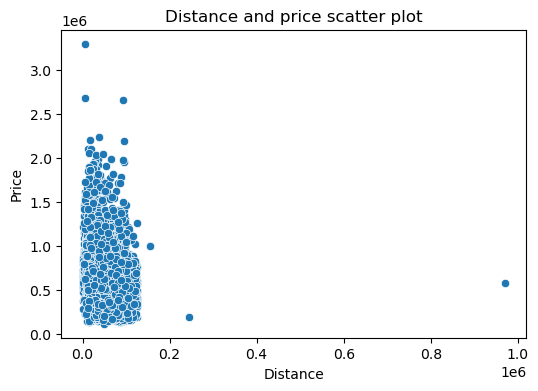

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="Distance",y="Price")
plt.title("Distance and price scatter plot")
plt.show()

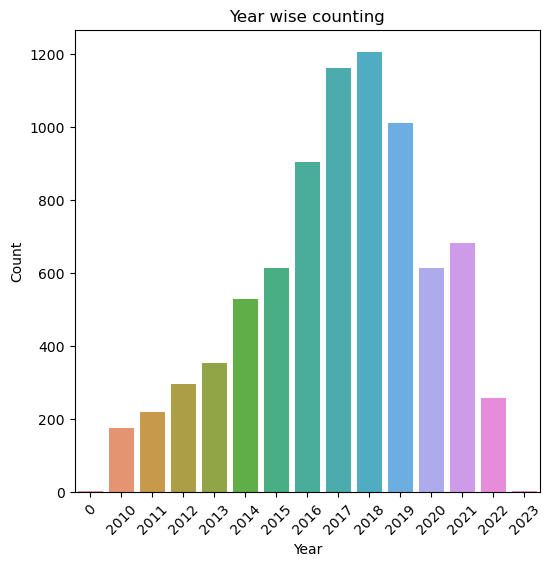

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="Year")
plt.title("Year wise counting")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

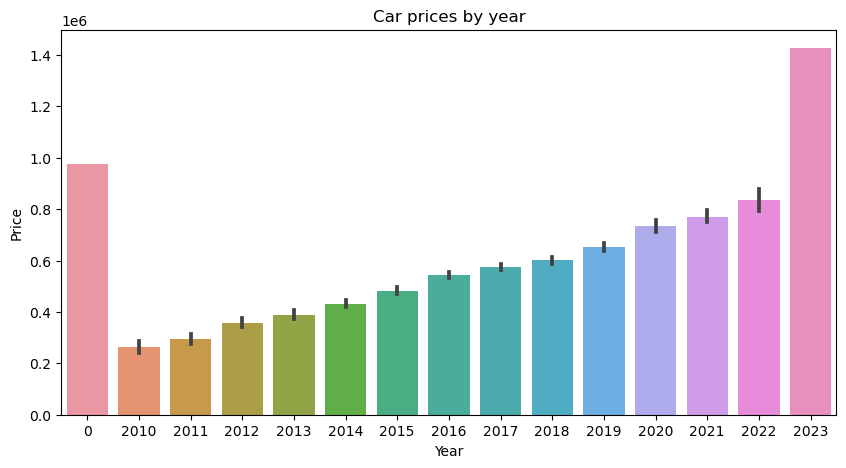

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Year",y="Price")
plt.title("Car prices by year")
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car Name  8015 non-null   object
 1   Year      8015 non-null   int32 
 2   Distance  8015 non-null   int64 
 3   Owner     8015 non-null   int64 
 4   Fuel      8015 non-null   object
 5   Location  8015 non-null   object
 6   Drive     8015 non-null   object
 7   Type      8015 non-null   object
 8   Price     8015 non-null   int64 
dtypes: int32(1), int64(3), object(5)
memory usage: 532.4+ KB


In [35]:
x=df.drop(["Car Name","Price"],axis=1)

In [36]:
x

,Year,Distance,Owner,Fuel,Location,Drive,Type
0,2022,3878,1,PETROL,Haryana,Manual,HatchBack
1,2018,32041,1,PETROL,Tamil Nadu,Manual,Sedan
2,2021,96339,1,DIESEL,Telangana,Automatic,SUV
3,2019,51718,1,DIESEL,West Bengal,Manual,SUV
4,2021,19811,1,PETROL,Haryana,Manual,HatchBack
...,...,...,...,...,...,...,...
8010,2018,11500,1,PETROL,Maharashtra,Manual,HatchBack
8011,2018,73393,2,PETROL,Karnataka,Manual,Sedan
8012,2016,83810,2,PETROL,Uttar Pradesh,Manual,Sedan
8013,2019,39162,1,PETROL,Chandigarh,Automatic,HatchBack


In [37]:
y=df["Price"]
y

0        514000
1        674000
2       1952000
3        690000
4        526000
         ...   
8010     292000
8011     534000
8012     424000
8013     685000
8014     392000
Name: Price, Length: 8015, dtype: int64

In [38]:
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[("Encoder",OrdinalEncoder(),['Fuel','Location','Drive','Type'])],remainder="passthrough")
x=ct.fit_transform(x)

In [39]:
x[0]

array([3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 2.022e+03, 3.878e+03,
       1.000e+00])

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
minmax=MinMaxScaler()
xtrain=minmax.fit_transform(xtrain)
xtest=minmax.transform(xtest)

In [42]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [43]:
r2_score(ytest,ypred)

0.37888923420589726

In [44]:
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.3741679691806099
testing result: 0.37888923420589726


In [45]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Linear Regression ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': lr.score(xtrain,ytrain),
                 'Testing Score': lr.score(xtest,ytest)})

model_lr_report = model_report.append(tmp1, ignore_index = True)
model_lr_report

,Model,R2 Score,Trainign Score,Testing Score
0,Linear Regression,0.378889,0.374168,0.378889


In [46]:
l1=Lasso()
l1.fit(xtrain,ytrain)
ypred=l1.predict(xtest)

In [47]:
r2_score(ytest,ypred)

0.3788517266134711

In [48]:
train=l1.score(xtrain,ytrain)
test=l1.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.3741678656939591
testing result: 0.3788517266134711


In [49]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Lasso Regression ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': l1.score(xtrain,ytrain),
                 'Testing Score': l1.score(xtest,ytest)})

model_l1_report = model_report.append(tmp1, ignore_index = True)
model_l1_report

,Model,R2 Score,Trainign Score,Testing Score
0,Lasso Regression,0.378852,0.374168,0.378852


In [50]:
l2=Ridge()
l2.fit(xtrain,ytrain)
ypred=l2.predict(xtest)

In [51]:
r2_score(ytest,ypred)

0.37270785163144904

In [52]:
train=l2.score(xtrain,ytrain)
test=l2.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.37286016548145207
testing result: 0.37270785163144904


In [53]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Ridge Regression ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': l2.score(xtrain,ytrain),
                 'Testing Score': l2.score(xtest,ytest)})

model_l2_report = model_report.append(tmp1, ignore_index = True)
model_l2_report

,Model,R2 Score,Trainign Score,Testing Score
0,Ridge Regression,0.372708,0.37286,0.372708


In [54]:
decision_tree_reg=DecisionTreeRegressor()
param_grid = {'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search=GridSearchCV(estimator=decision_tree_reg,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [55]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [56]:
decision_tree_reg=grid_search.best_estimator_
decision_tree_reg.fit(xtrain,ytrain)
ypred=decision_tree_reg.predict(xtest)

In [57]:
r2_score(ytest,ypred)

0.6689237469811123

In [58]:
train=decision_tree_reg.score(xtrain,ytrain)
test=decision_tree_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.767957820578156
testing result: 0.6689237469811123


In [59]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Decision Tree ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': decision_tree_reg.score(xtrain,ytrain),
                 'Testing Score': decision_tree_reg.score(xtest,ytest)})

model_decision_tree_reg_report = model_report.append(tmp1, ignore_index = True)
model_decision_tree_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,Decision Tree,0.668924,0.767958,0.668924


In [60]:
svr=SVR()
param_grid={'C': [0.1, 1, 10],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'epsilon': [0.1, 0.2, 0.3]}
grid_search=GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [61]:
grid_search.best_params_

{'C': 10, 'epsilon': 0.1, 'kernel': 'poly'}

In [62]:
svr=grid_search.best_estimator_
svr.fit(xtrain,ytrain)
ypred=svr.predict(xtest)

In [63]:
r2_score(ytest,ypred)

0.11157411405214845

In [64]:
train=svr.score(xtrain,ytrain)
test=svr.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.10279594090872701
testing result: 0.11157411405214845


In [65]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " SVR ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': svr.score(xtrain,ytrain),
                 'Testing Score': svr.score(xtest,ytest)})

model_svr_report = model_report.append(tmp1, ignore_index = True)
model_svr_report

,Model,R2 Score,Trainign Score,Testing Score
0,SVR,0.111574,0.102796,0.111574


In [66]:
knn_reg = KNeighborsRegressor()
param_grid = {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(estimator=knn_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [67]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [68]:
knn_reg=grid_search.best_estimator_
knn_reg.fit(xtrain,ytrain)
ypred=knn_reg.predict(xtest)

In [69]:
r2_score(ytest,ypred)

0.5536455508991731

In [70]:
train=knn_reg.score(xtrain,ytrain)
test=knn_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.9999919518128387
testing result: 0.5536455508991731


In [71]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " KNN ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': knn_reg.score(xtrain,ytrain),
                 'Testing Score': knn_reg.score(xtest,ytest)})

model_knn_reg_report = model_report.append(tmp1, ignore_index = True)
model_knn_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,KNN,0.553646,0.999992,0.553646


In [73]:
rf_reg = RandomForestRegressor()
param_grid = {'n_estimators': [25, 50, 100, 150],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [None,3, 5, 7, 9],
            'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'bootstrap': [True, False]}
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5,n_jobs=-1, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='r2')

In [74]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [75]:
rf_reg=grid_search.best_estimator_
rf_reg.fit(xtrain,ytrain)
ypred=rf_reg.predict(xtest)

In [76]:
r2_score(ytest,ypred)

0.703393832772921

In [77]:
train=rf_reg.score(xtrain,ytrain)
test=rf_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.8162272888501033
testing result: 0.703393832772921


In [78]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Random Forest ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': rf_reg.score(xtrain,ytrain),
                 'Testing Score': rf_reg.score(xtest,ytest)})

model_rf_reg_report = model_report.append(tmp1, ignore_index = True)
model_rf_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,Random Forest,0.703394,0.816227,0.703394


In [82]:
bagging_reg = BaggingRegressor()
param_grid = {'n_estimators': [10, 50, 100],'max_samples': [0.5, 0.7, 1.0]}
grid_search = GridSearchCV(estimator=bagging_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='r2')

In [83]:
grid_search.best_params_

{'max_samples': 0.5, 'n_estimators': 100}

In [84]:
bagging_reg=grid_search.best_estimator_
bagging_reg.fit(xtrain,ytrain)
ypred=bagging_reg.predict(xtest)

In [85]:
r2_score(ytest,ypred)

0.6895293768527877

In [86]:
train=bagging_reg.score(xtrain,ytrain)
test=bagging_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.8725552708187461
testing result: 0.6895293768527877


In [87]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Bagging ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': bagging_reg.score(xtrain,ytrain),
                 'Testing Score': bagging_reg.score(xtest,ytest)})

model_bagging_reg_report = model_report.append(tmp1, ignore_index = True)
model_bagging_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,Bagging,0.689529,0.872555,0.689529


In [89]:
adaboost_reg = AdaBoostRegressor()
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}
grid_search = GridSearchCV(estimator=adaboost_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [90]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [91]:
adaboost_reg=grid_search.best_estimator_
adaboost_reg.fit(xtrain,ytrain)
ypred=adaboost_reg.predict(xtest)

In [92]:
r2_score(ytest,ypred)

0.5835692727576252

In [93]:
train=adaboost_reg.score(xtrain,ytrain)
test=adaboost_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.5870772200568566
testing result: 0.5835692727576252


In [94]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " Adaboost ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': adaboost_reg.score(xtrain,ytrain),
                 'Testing Score': adaboost_reg.score(xtest,ytest)})

model_adaboost_reg_report = model_report.append(tmp1, ignore_index = True)
model_adaboost_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,Adaboost,0.583569,0.587077,0.583569


In [95]:
gradient_boosting_reg = GradientBoostingRegressor()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1, 0.2]}
grid_search = GridSearchCV(estimator=gradient_boosting_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [96]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [97]:
gradient_boosting_reg=grid_search.best_estimator_
gradient_boosting_reg.fit(xtrain,ytrain)
ypred=gradient_boosting_reg.predict(xtest)

In [98]:
r2_score(ytest,ypred)

0.7079532877237202

In [99]:
train=gradient_boosting_reg.score(xtrain,ytrain)
test=gradient_boosting_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.7475328203426521
testing result: 0.7079532877237202


In [100]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " gradient boosting ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': gradient_boosting_reg.score(xtrain,ytrain),
                 'Testing Score': gradient_boosting_reg.score(xtest,ytest)})

model_gradient_boosting_reg_report = model_report.append(tmp1, ignore_index = True)
model_gradient_boosting_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,gradient boosting,0.707953,0.747533,0.707953


In [102]:
xgb_reg = XGBRegressor()
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]}
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='r2')

In [103]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [104]:
xgb_reg=grid_search.best_estimator_
xgb_reg.fit(xtrain,ytrain)
ypred=xgb_reg.predict(xtest)

In [105]:
r2_score(ytest,ypred)

0.7061635009144018

In [106]:
train=xgb_reg.score(xtrain,ytrain)
test=xgb_reg.score(xtest,ytest)
print(f"training result: {train}")
print(f"testing result: {test}")

training result: 0.7669942967279844
testing result: 0.7061635009144018


In [107]:
model_report = pd.DataFrame()
tmp1 = pd.Series({'Model': " xgb boosting ",
                 'R2 Score' : r2_score(ytest,ypred),
                 'Trainign Score': xgb_reg.score(xtrain,ytrain),
                 'Testing Score': xgb_reg.score(xtest,ytest)})

model_xgb_reg_report = model_report.append(tmp1, ignore_index = True)
model_xgb_reg_report

,Model,R2 Score,Trainign Score,Testing Score
0,xgb boosting,0.706164,0.766994,0.706164


In [109]:
cols = ['Model', 'R2 Score', 'Trainign Score', 'Testing Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_lr_report,model_l1_report,model_l2_report,model_decision_tree_reg_report,model_svr_report,
                      model_knn_reg_report,model_rf_reg_report,model_bagging_reg_report,model_adaboost_reg_report,
                      model_gradient_boosting_reg_report,model_xgb_reg_report], ignore_index = True)
model

,Model,R2 Score,Trainign Score,Testing Score
0,Linear Regression,0.378889,0.374168,0.378889
1,Lasso Regression,0.378852,0.374168,0.378852
2,Ridge Regression,0.372708,0.372860,0.372708
3,Decision Tree,0.668924,0.767958,0.668924
4,SVR,0.111574,0.102796,0.111574
5,KNN,0.553646,0.999992,0.553646
6,Random Forest,0.703394,0.816227,0.703394
7,Bagging,0.689529,0.872555,0.689529
8,Adaboost,0.583569,0.587077,0.583569
9,gradient boosting,0.707953,0.747533,0.707953


In [112]:
model.loc[model["R2 Score"]==model["R2 Score"].max()]

,Model,R2 Score,Trainign Score,Testing Score
9,gradient boosting,0.707953,0.747533,0.707953
